In [ ]:
from transformers import pipeline

### Zero-Shot Classification
The model is pre-trained on a large set of text data, enabling it to understand word meaning in certain patterns. Each piece of text in this data is represented using numerical values. The abundance of training data allows the model to assign similar numerical values to texts with similar meanings.

When we provide new text and the labels we wish to test, the model converts both the text and the labels into numerical embeddings. It then compares the similarity between the numerical values of the new text and the values of the labels. By measuring these similarities the model identifies which category the text most likely belongs to.

In [ ]:
classifier = pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public model

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
text = '''
CAIRO: Israel hit a Gaza school on Thursday with what it described as a targeted airstrike on up to 30 Hamas fighters inside, and a Hamas official said 40 people, including women and children, were killed as they sheltered in the UN site.

Video footage showed Palestinians hauling away bodies after the attack, which took place at a sensitive moment in mediated talks on a ceasefire that would involve releasing prisoners held by Hamas and some of the Palestinians held in Israeli jails.

The United States issued a joint statement with other countries on Thursday calling on Israel and Hamas to make whatever compromises were necessary to finalise a deal after eight months of war in the Gaza Strip.

Ismail Al-Thawabta, the director of the Hamas-run government media office, rejected Israel’s assertion that the UN school in Nuseirat, in central Gaza, had hidden a Hamas command post.

“The occupation uses … false fabricated stories to justify the brutal crime it conducted against dozens of displaced people,” Thawabta told Reuters.

Israel’s military said its fighter jets had carried out a “precise strike” and circulated satellite photos highlighting two parts of a building where it said the fighters were based. “We’re very confident in the intelligence,” military spokesperson Lt Col Peter Lerner said, accusing Hamas and Islamic Jihad fighters of deliberately using UN facilities as operational bases.

He said 20-30 fighters were located in the compound, and many of them had been killed, but had no precise details as intelligence assessments were being carried out.

As people at the school cleared rubble from bloodstained classrooms, survivor Huda Abu Dhaher described waking up to the sound of rockets. “People’s remains were scattered inside the yard and outside. The gas canister exploded,” she told Reuters.

“My nephew was martyred (killed), he lost his leg and arm, he was a 10-year-old … This woman’s leg got a fragment in it, her son bled from his mouth and leg, her mother-in-law sustained three injuries.”

The school, run by the UN Palestinian refugee agency (UNRWA), was sheltering 6,000 displaced people at the time, UNRWA chief Philippe Lazzarini said
'''

In [ ]:
Identification = ['political','racial','gender']

In [ ]:
Sore = classifier(text,Identification)

In [ ]:
for i in range(len(Sore)):
    print(Identification[i], " = ",float(Sore['scores'][i])*100,"%" )

political  =  47.7212518453598 %
racial  =  39.491888880729675 %
gender  =  12.786860764026642 %


### Named entity recognition

It breaks text into smaller units (tokens) and uses pre-trained models to recognize these entities based on features like context and capitalization.
Recognization is one of the 3:
1. Persons
2. Locations
3. Organizations.


In [ ]:
ner = pipeline("ner", grouped_entities=True)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:168: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


In [ ]:
Entities = ner(text)

In [ ]:
for j in range(3):
  for i in range(len(Entities)):
      print(Entities[i]['word'],Entities[j]['entity_group'])

CAIR ORG
Israel ORG
Gaza ORG
Hamas ORG
Hamas ORG
UN ORG
Palestinians ORG
Hamas ORG
Palestinians ORG
Israeli ORG
United States ORG
Israel ORG
Hamas ORG
Gaza Strip ORG
Ismail Al - Thawabta ORG
Hamas ORG
Israel ORG
UN ORG
Nuseirat ORG
Gaza ORG
Hamas ORG
Thawabta ORG
Reuters ORG
Israel ORG
Peter Lerner ORG
Hamas ORG
Islamic Jihad ORG
UN ORG
Huda Abu Dhaher ORG
Reuters ORG
UN ORG
Palestinian ORG
UNRWA ORG
UNRWA ORG
Philippe ORG
La ORG
CAIR LOC
Israel LOC
Gaza LOC
Hamas LOC
Hamas LOC
UN LOC
Palestinians LOC
Hamas LOC
Palestinians LOC
Israeli LOC
United States LOC
Israel LOC
Hamas LOC
Gaza Strip LOC
Ismail Al - Thawabta LOC
Hamas LOC
Israel LOC
UN LOC
Nuseirat LOC
Gaza LOC
Hamas LOC
Thawabta LOC
Reuters LOC
Israel LOC
Peter Lerner LOC
Hamas LOC
Islamic Jihad LOC
UN LOC
Huda Abu Dhaher LOC
Reuters LOC
UN LOC
Palestinian LOC
UNRWA LOC
UNRWA LOC
Philippe LOC
La LOC
CAIR LOC
Israel LOC
Gaza LOC
Hamas LOC
Hamas LOC
UN LOC
Palestinians LOC
Hamas LOC
Palestinians LOC
Israeli LOC
United States LOC
Is

### OCR
The model converts different types of documents, such as scanned paper documents or photos of text, into editable and searchable data. It processes images to identify text characters, breaking the image into smaller units

In [ ]:
mm_pipeline = pipeline("image-to-text",model="llava-hf/llava-1.5-7b-hf")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/llava/configuration_llava.py:100: FutureWarning: The `vocab_size` argument is deprecated and will be removed in v4.42, since it can be inferred from the `text_config`. Passing this argument has no effect
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

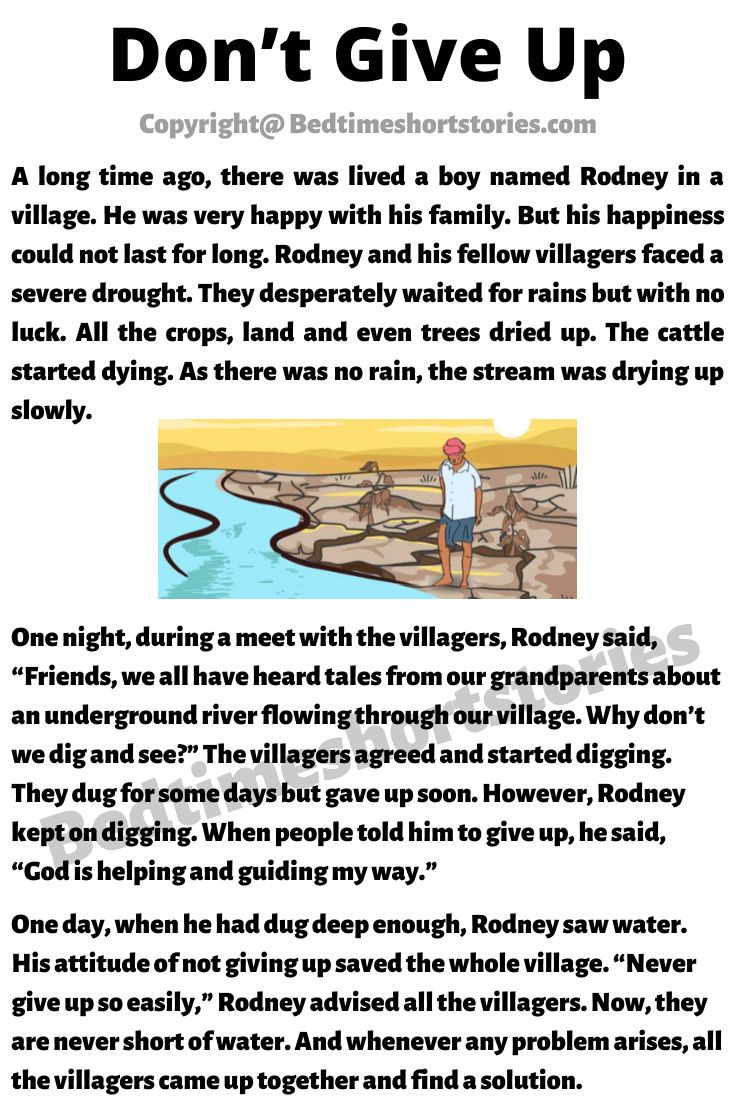

In [ ]:
mm_pipeline("https://i.pinimg.com/736x/d1/dc/42/d1dc427714619b8f774802c348d83117.jpg", "Why should we not give up?")

A large amount of RAM was required for this so using google collab support was insufficent.